<a href="https://colab.research.google.com/github/paulinawdowiak1/ML-Bootcamp/blob/main/neuron_networks/001_Klasyfikator_wieloklasowy_Digit_Recognitionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Klasyfikator wieloklasowy - Digit Recognition

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
    1. [Import bibliotek](#a2)
    2. [Załadowanie i przygotowanie danych](#a3)
    3. [Eksploracja danych](#a4)
    4. [Budowa sieci neuronowej](#a5)    
    5. [Trenowanie modelu](#a6)
    6. [Ocena modelu](#a7)
    7. [Predykcja na podstawie modelu](#a8)

### <a name='a1'></a>1. Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z interfejsem Google Colab oraz budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.

> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów). 

#### <a name='a2'></a> 1.1 Import bibliotek

In [3]:
# Przygotowanie środowiska do pracy z Tensorflow 2.0.
# Jeśli otrzymasz błąd podczas instalacji Tensorflow uruchom tę komórkę raz jeszcze.

!pip uninstall -y tensorflow
!pip install -q tensorflow==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.11.0


### <a name='a3'></a> 1.2 Załadowanie i przygotowanie danych

In [5]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [7]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [8]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='a4'></a> 1.3 Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

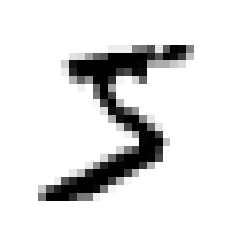

In [9]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

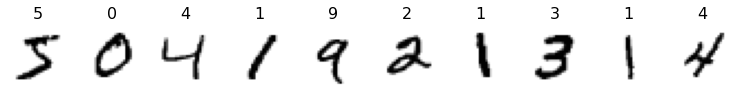

In [10]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

### <a name='a5'></a> 1.4 Budowa sieci neuronowej

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='a6'></a> 1.5 Trenowanie modelu

In [13]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2978 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1425 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1061 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0884 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0741 - accuracy: 0.9763


### <a name='a7'></a> 1.6 Ocena modelu

In [14]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0719 - accuracy: 0.9773 - 900ms/epoch - 3ms/step


[0.0719226524233818, 0.9772999882698059]

In [15]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.297755,0.913967
1,0.142486,0.957167
2,0.106075,0.968300
3,0.088365,0.972850
4,0.074091,0.976283


In [16]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

### <a name='a8'></a> 1.7 Predykcja na podstawie modelu

In [17]:
model.predict(X_test)
#prawdopodibieństwa przynależności do danej klasy

313/313 [==============================] - 1s 3ms/step


array([[0.000000019625, 0.00000022329 , 0.000015544561, ..., 0.999846      , 0.000001051914, 0.000016398706],
       [0.000000032751, 0.00017758492 , 0.999815      , ..., 0.000000000104, 0.000001344771, 0.            ],
       [0.000000126176, 0.99985313    , 0.000031256197, ..., 0.000082096776, 0.000018318826, 0.000000120597],
       ...,
       [0.            , 0.000000003679, 0.000000000074, ..., 0.000001093181, 0.000000037413, 0.000010552561],
       [0.000000023133, 0.000000000079, 0.000000000173, ..., 0.00000000772 , 0.00015709223 , 0.00000000773 ],
       [0.000000013739, 0.            , 0.000000758292, ..., 0.            , 0.000000000086, 0.00000000005 ]],
      dtype=float32)

In [19]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred
#w ten sposób mamy klase predykowaną

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [20]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [23]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([8, 61, 149, 247, 274, 321, 340, 381, 495, 578], dtype='int64')

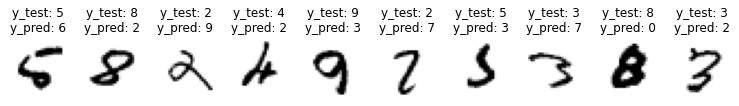

In [24]:
plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color='black', fontsize=12)
plt.show()